# Task 2.3: Bayesian regression for missing value prediction

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Function

In [40]:
# Returns y = w0 + w1*x + w2*x^2 + w3*x^3 + w4*x^4 + w5*x^5
# Variables:-
#   w: array of weights
#   x: value
def curve(w, x):
    return w[0]+w[1]*x+w[2]*x**2+w[3]*x**3+w[4]*x**4+w[5]*x**5

## Data

In [41]:
dt = np.dtype([('w', np.float), ('h', np.float), ('g', np.str_, 1)])
data = np.loadtxt('whData.dat', dtype=dt, comments='#', delimiter=None)

In [5]:
x = data['h'] # height
y = data['w'] # weight

In [6]:
data_wo = data[data['w'] > -1] # data without outliers
x_wo = data_wo['h'] # height without outliers
y_wo = data_wo['w'] # weight without outliers
outliers = data[data['w'] == -1]

## Detecting weights

In [21]:
sigma0sq = 3.0
I = np.identity(6)
X = np.vstack((np.ones(x_wo.shape), x_wo, x_wo**2, x_wo**3, x_wo**4, x_wo**5))
sigmasq = np.var(y_wo)


C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


### Bayesian Regression

In [ ]:
w_map = np.dot(np.dot(np.linalg.inv(np.dot(X,X.T) + sigmasq/sigma0sq * I),X),y_wo)

###  Polynomial Regression

In [ ]:
w_mle = np.linalg.lstsq(X.T, y_wo)[0]

In [26]:
def plot_curve(x, w, plt):
    y = []
    for x_i in x:
        y.append(curve(w, x_i))
        
    y = np.array(y)
    plt.plot(x, y)
    
    return y

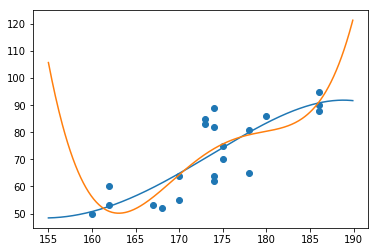

In [28]:
plt.scatter(x_wo, y_wo)
x_plot = np.arange(155,190,0.1)
y_map = plot_curve(x_plot, w_map, plt)
y_mle = plot_curve(x_plot, w_mle, plt)

## Predicted Weights

In [39]:
predicted_weights = []
for x in outliers['h']:
    predicted_weights.append(curve(w_map, x))

outliers['w'] = predicted_weights
print(outliers)

[(61.29383185, 168., 'f') (68.5821912 , 172., 'm')
 (59.62399567, 167., 'f')]
